In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

In [2]:
# !pip install imblearn

In [3]:
df1 = pd.read_csv('Taiwain_integrated_da.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'Taiwain_integrated_da.csv'

In [8]:
df2 = pd.read_csv('USA_integrated_data.csv')

In [9]:
df2.shape

(92845, 15)

In [10]:
df1.shape

(6819, 13)

In [11]:
df1

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102,1.0
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080,1.0
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138,1.0
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046,1.0
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0.942388,0.216602,0.010451,0.493687,0.848030,0.027064,0.103448,0.998992,0.840359,-0.075697,7.070000e+09,0.022138,0.0
6815,0.892640,0.216697,0.009259,0.475162,0.848037,0.027009,0.103448,0.998992,0.840306,-0.300213,5.220000e+09,0.022159,0.0
6816,0.904986,0.210929,0.025836,0.472725,0.847978,0.026791,0.106447,0.998984,0.840138,1.774027,5.990000e+09,0.022068,0.0
6817,0.919319,0.228326,0.012782,0.506264,0.847980,0.026822,0.109445,0.999018,0.841084,0.126140,7.250000e+09,0.022138,0.0


#### Integration

In [12]:
df1.shape

(6819, 13)

In [13]:
df1.columns

Index(['Tobin's Q', 'EPS', 'Liquidity', 'Profitability', 'Productivity',
       'Leverage Ratio', 'Asset Turnover', 'Operational Margin',
       'Return on Equity', 'Market Book Ratio', 'Assets Growth',
       'Sales Growth', 'BK'],
      dtype='object')

In [14]:
df2.shape

(92845, 15)

In [15]:
df2.columns

Index(['Data Year - Fiscal', 'Tobin's Q', 'EPS', 'Liquidity', 'Profitability',
       'Productivity', 'Leverage Ratio', 'Asset Turnover',
       'Operational Margin', 'Return on Equity', 'Market Book Ratio',
       'Assets Growth', 'Sales Growth', 'Employee Growth', 'BK'],
      dtype='object')

In [16]:
df2.drop(['Data Year - Fiscal','Employee Growth'],axis=1,inplace=True)

In [17]:
df2.columns


Index(['Tobin's Q', 'EPS', 'Liquidity', 'Profitability', 'Productivity',
       'Leverage Ratio', 'Asset Turnover', 'Operational Margin',
       'Return on Equity', 'Market Book Ratio', 'Assets Growth',
       'Sales Growth', 'BK'],
      dtype='object')

In [18]:
df = pd.concat([df1,df2],axis=0)

In [19]:
df

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102,1.0
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080,1.0
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138,1.0
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046,1.0
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92840,1.520923,-1.488171,-0.015494,-0.758859,-0.056905,1.345005,0.174115,-0.326823,-0.283168,-1.846719,-7.328654e-02,0.327312,0.0
92841,1.988495,-1.807630,0.093838,-1.204734,-0.121122,1.345005,0.215844,-0.270563,-0.283168,-2.474549,-2.018347e-01,-0.010544,0.0
92842,0.923868,-0.015660,0.039260,0.000000,-0.082429,0.744907,0.254186,-0.324286,-0.283168,347.810044,-1.680005e-01,-0.020206,0.0
92843,0.787787,-0.133054,0.053678,-0.029471,0.000998,0.574570,0.195683,0.005101,-0.085842,36.474842,7.693645e-02,-0.170928,0.0


In [20]:
df.shape

(99664, 13)

In [21]:
df['BK'].value_counts()

0.0    98886
1.0      778
Name: BK, dtype: int64

<AxesSubplot:xlabel='BK', ylabel='count'>

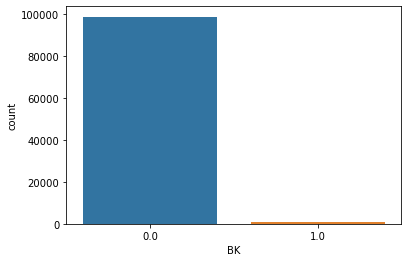

In [22]:
sns.countplot(x='BK', data=df)

In [23]:
#SMOTE

In [24]:
X=df.drop(labels=['BK'], axis=1)
y=df['BK']


In [25]:
oversample = SMOTE()
X,y=oversample.fit_resample(X,y)

<AxesSubplot:xlabel='BK', ylabel='count'>

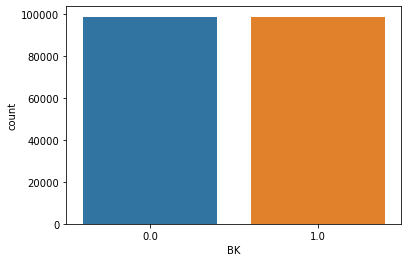

In [26]:
sns.countplot(x=y)

In [27]:
X.shape

(197772, 12)

In [28]:
X

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth
0,0.880352,0.228813,0.002259,0.505180,0.848195,0.026984,0.086957,0.999016,0.840402,0.112310,4.980000e+09,0.022102
1,0.922287,0.208944,0.006016,0.464291,0.848088,0.026984,0.064468,0.999018,0.839969,0.174045,6.110000e+09,0.022080
2,1.037018,0.225628,0.011543,0.503822,0.848094,0.026984,0.014993,0.999026,0.841218,0.025855,7.280000e+09,0.022138
3,0.877219,0.224323,0.004194,0.505566,0.848005,0.026697,0.089955,0.999004,0.840402,1.774027,4.880000e+09,0.022046
4,0.858332,0.212537,0.006022,0.465022,0.848037,0.026984,0.175412,0.999016,0.839973,2.028921,5.510000e+09,0.022096
...,...,...,...,...,...,...,...,...,...,...,...,...
197767,2.117317,-0.442085,0.094530,-0.747601,-0.173982,0.613622,1.474504,-0.270563,-0.283168,-9.241654,2.324345e-01,0.327312
197768,2.195013,-0.297000,0.024609,-0.747601,-0.173982,-0.869461,0.367774,-0.270563,-0.131830,-246.055155,2.411484e-01,0.327312
197769,1.352535,0.289213,-0.268585,-0.814980,0.047139,1.134628,0.806387,0.004853,0.056094,85.250200,-6.677565e-02,0.182039
197770,3.066476,-0.764425,0.123883,-0.747601,-0.173982,1.307174,0.585000,-0.270563,-0.283168,-10.339465,-3.407935e-01,-0.327848


In [29]:
##NOrmalization

In [30]:
from sklearn.preprocessing import MinMaxScaler
normal_scaling = MinMaxScaler()
normalized_data = normal_scaling.fit_transform(X)
normalized_data

array([[2.29391041e-01, 4.85706488e-01, 3.39896297e-01, ...,
        3.62765076e-01, 4.98498499e-01, 4.34629568e-01],
       [2.40434581e-01, 4.82208439e-01, 3.42658975e-01, ...,
        3.62832507e-01, 6.11611612e-01, 4.34606246e-01],
       [2.70648217e-01, 4.85145790e-01, 3.46722466e-01, ...,
        3.62670644e-01, 7.28728729e-01, 4.34667263e-01],
       ...,
       [3.53738010e-01, 4.96340279e-01, 1.40746039e-01, ...,
        4.55758086e-01, 3.44075621e-11, 6.03340889e-01],
       [8.05094945e-01, 3.10840704e-01, 4.29325942e-01, ...,
        3.51348983e-01, 6.97834837e-12, 6.54800043e-02],
       [2.77842585e-01, 3.09353527e-01, 5.29128394e-01, ...,
        3.63642071e-01, 7.99663122e-12, 1.87241775e-01]])

In [31]:
normalized_data_df = pd.DataFrame(normalized_data,columns = df.columns[0:12])

<Figure size 3200x2240 with 0 Axes>

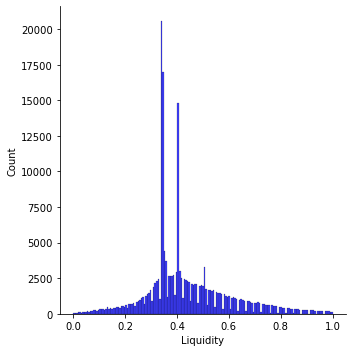

In [32]:
plt.figure(figsize=(40,28),dpi=80)
sns.displot(normalized_data_df["Liquidity"], color = 'blue', label = "Tobin's Q",kde = False)

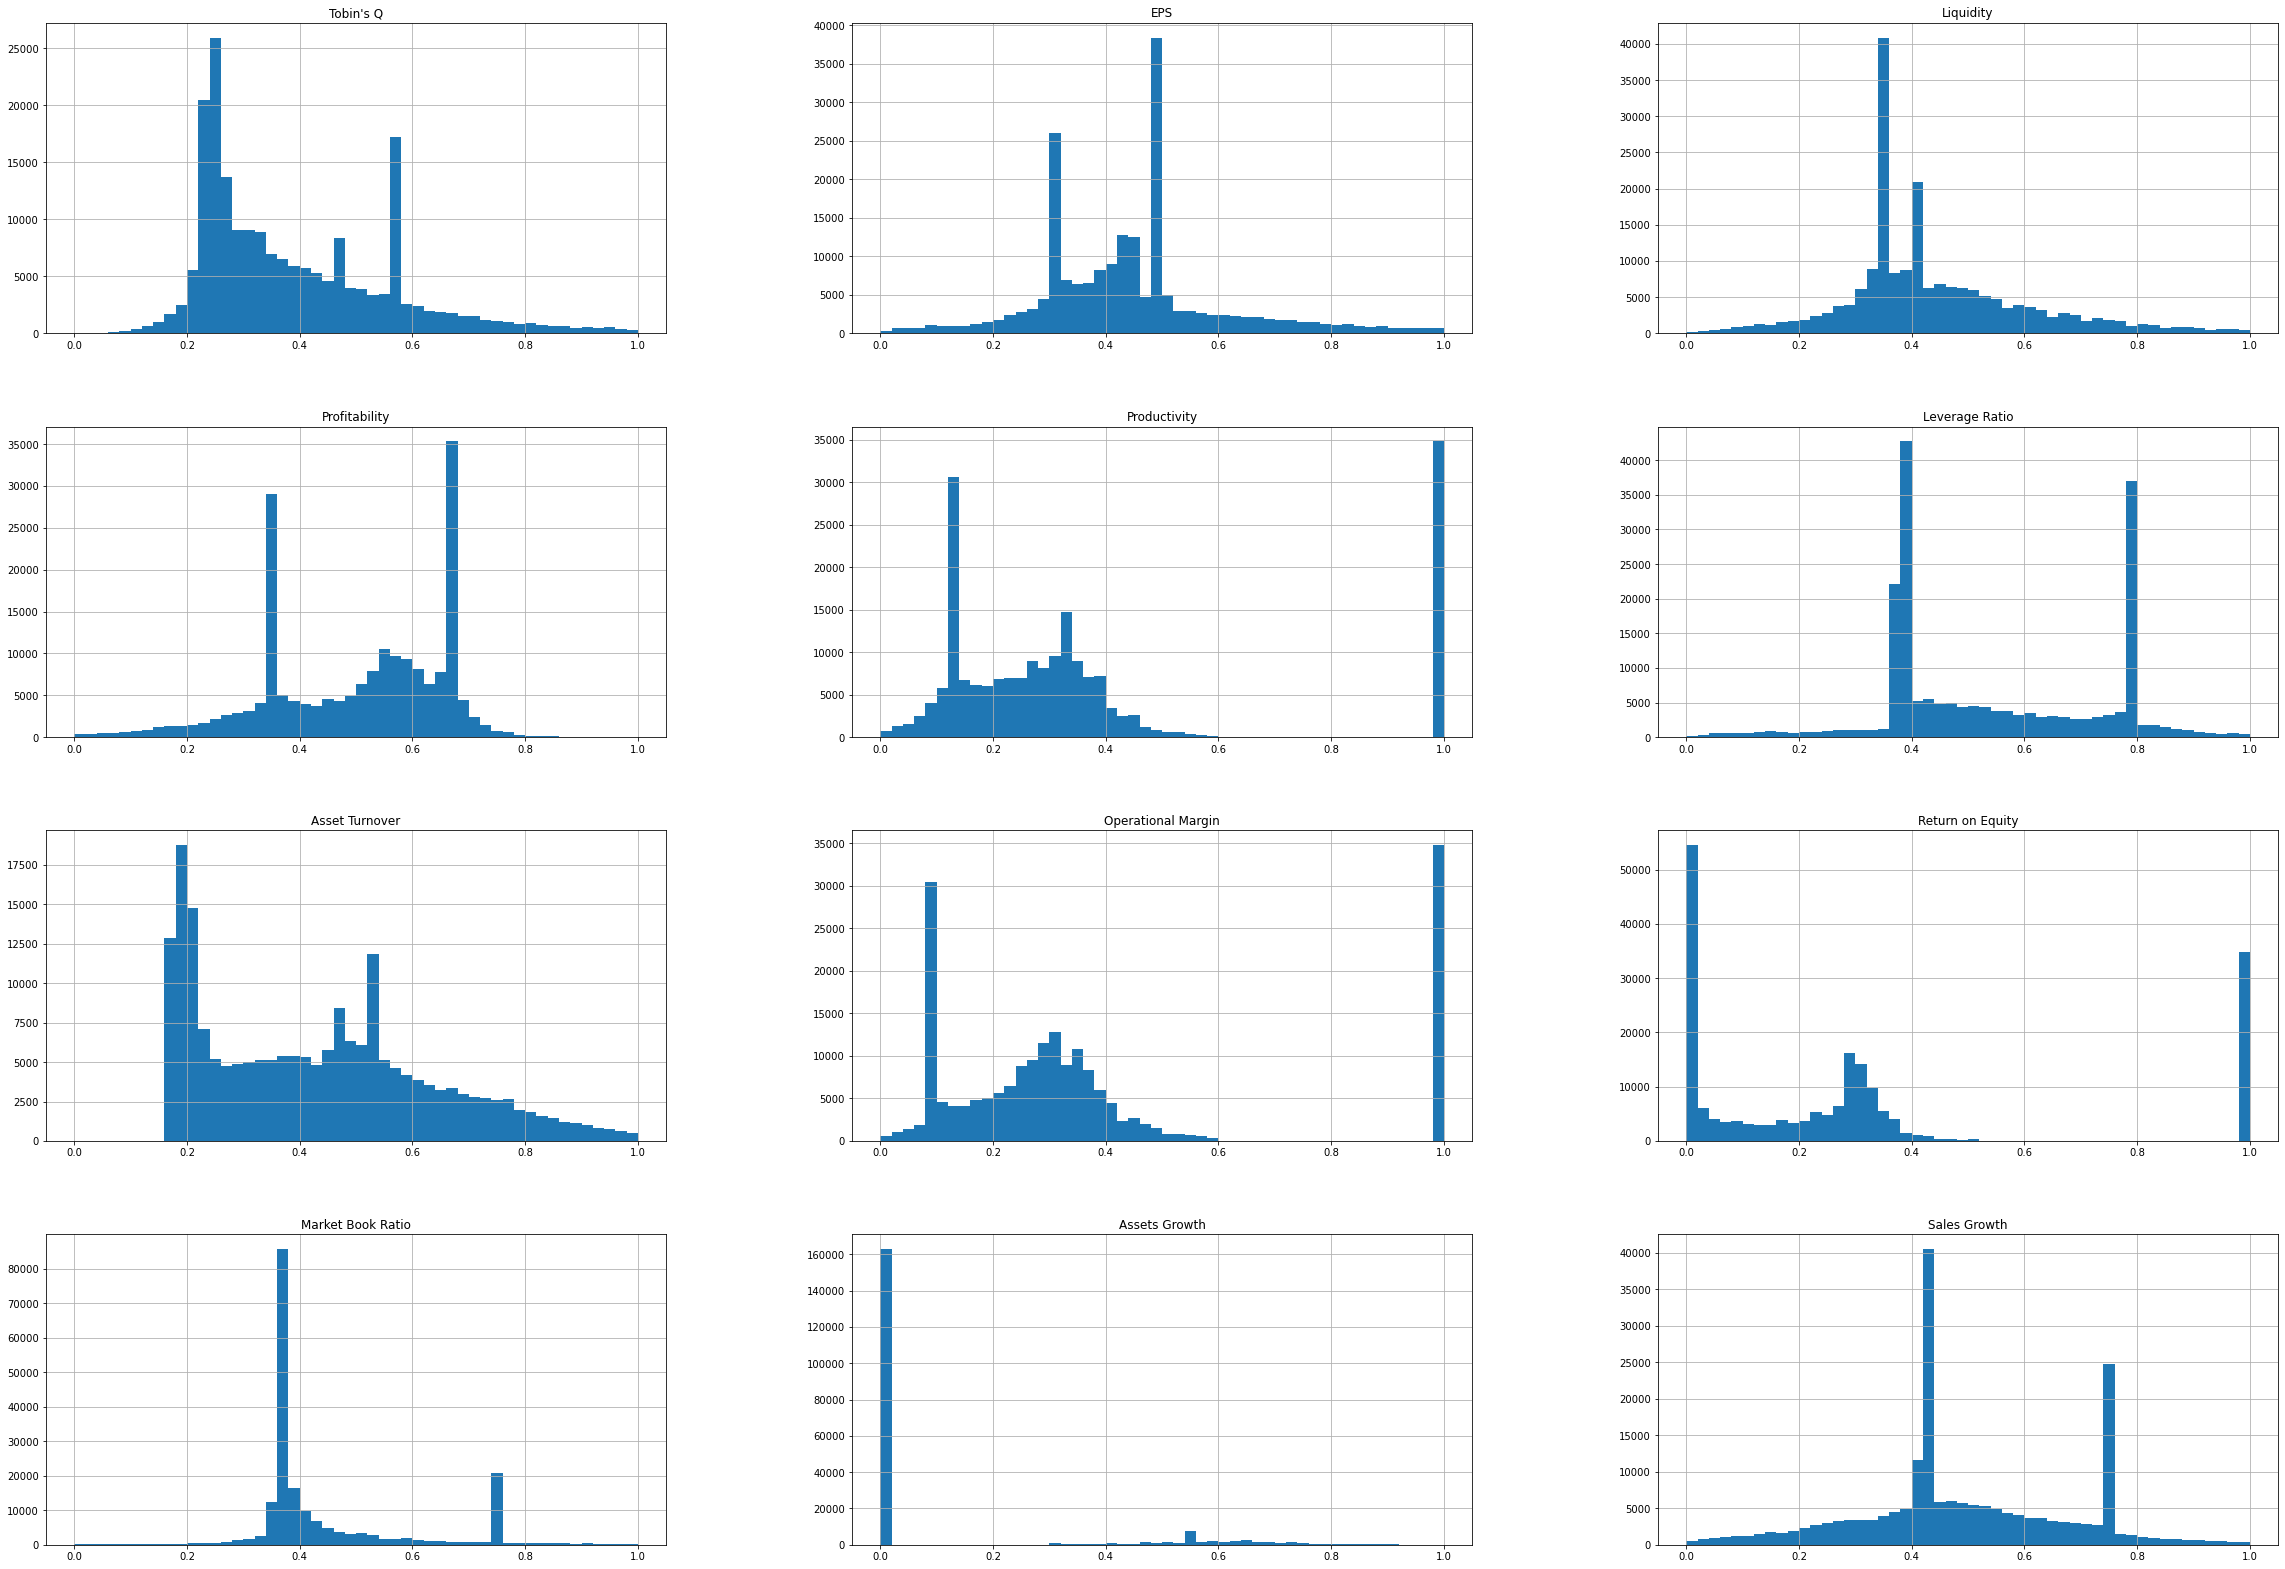

In [33]:
normalized_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

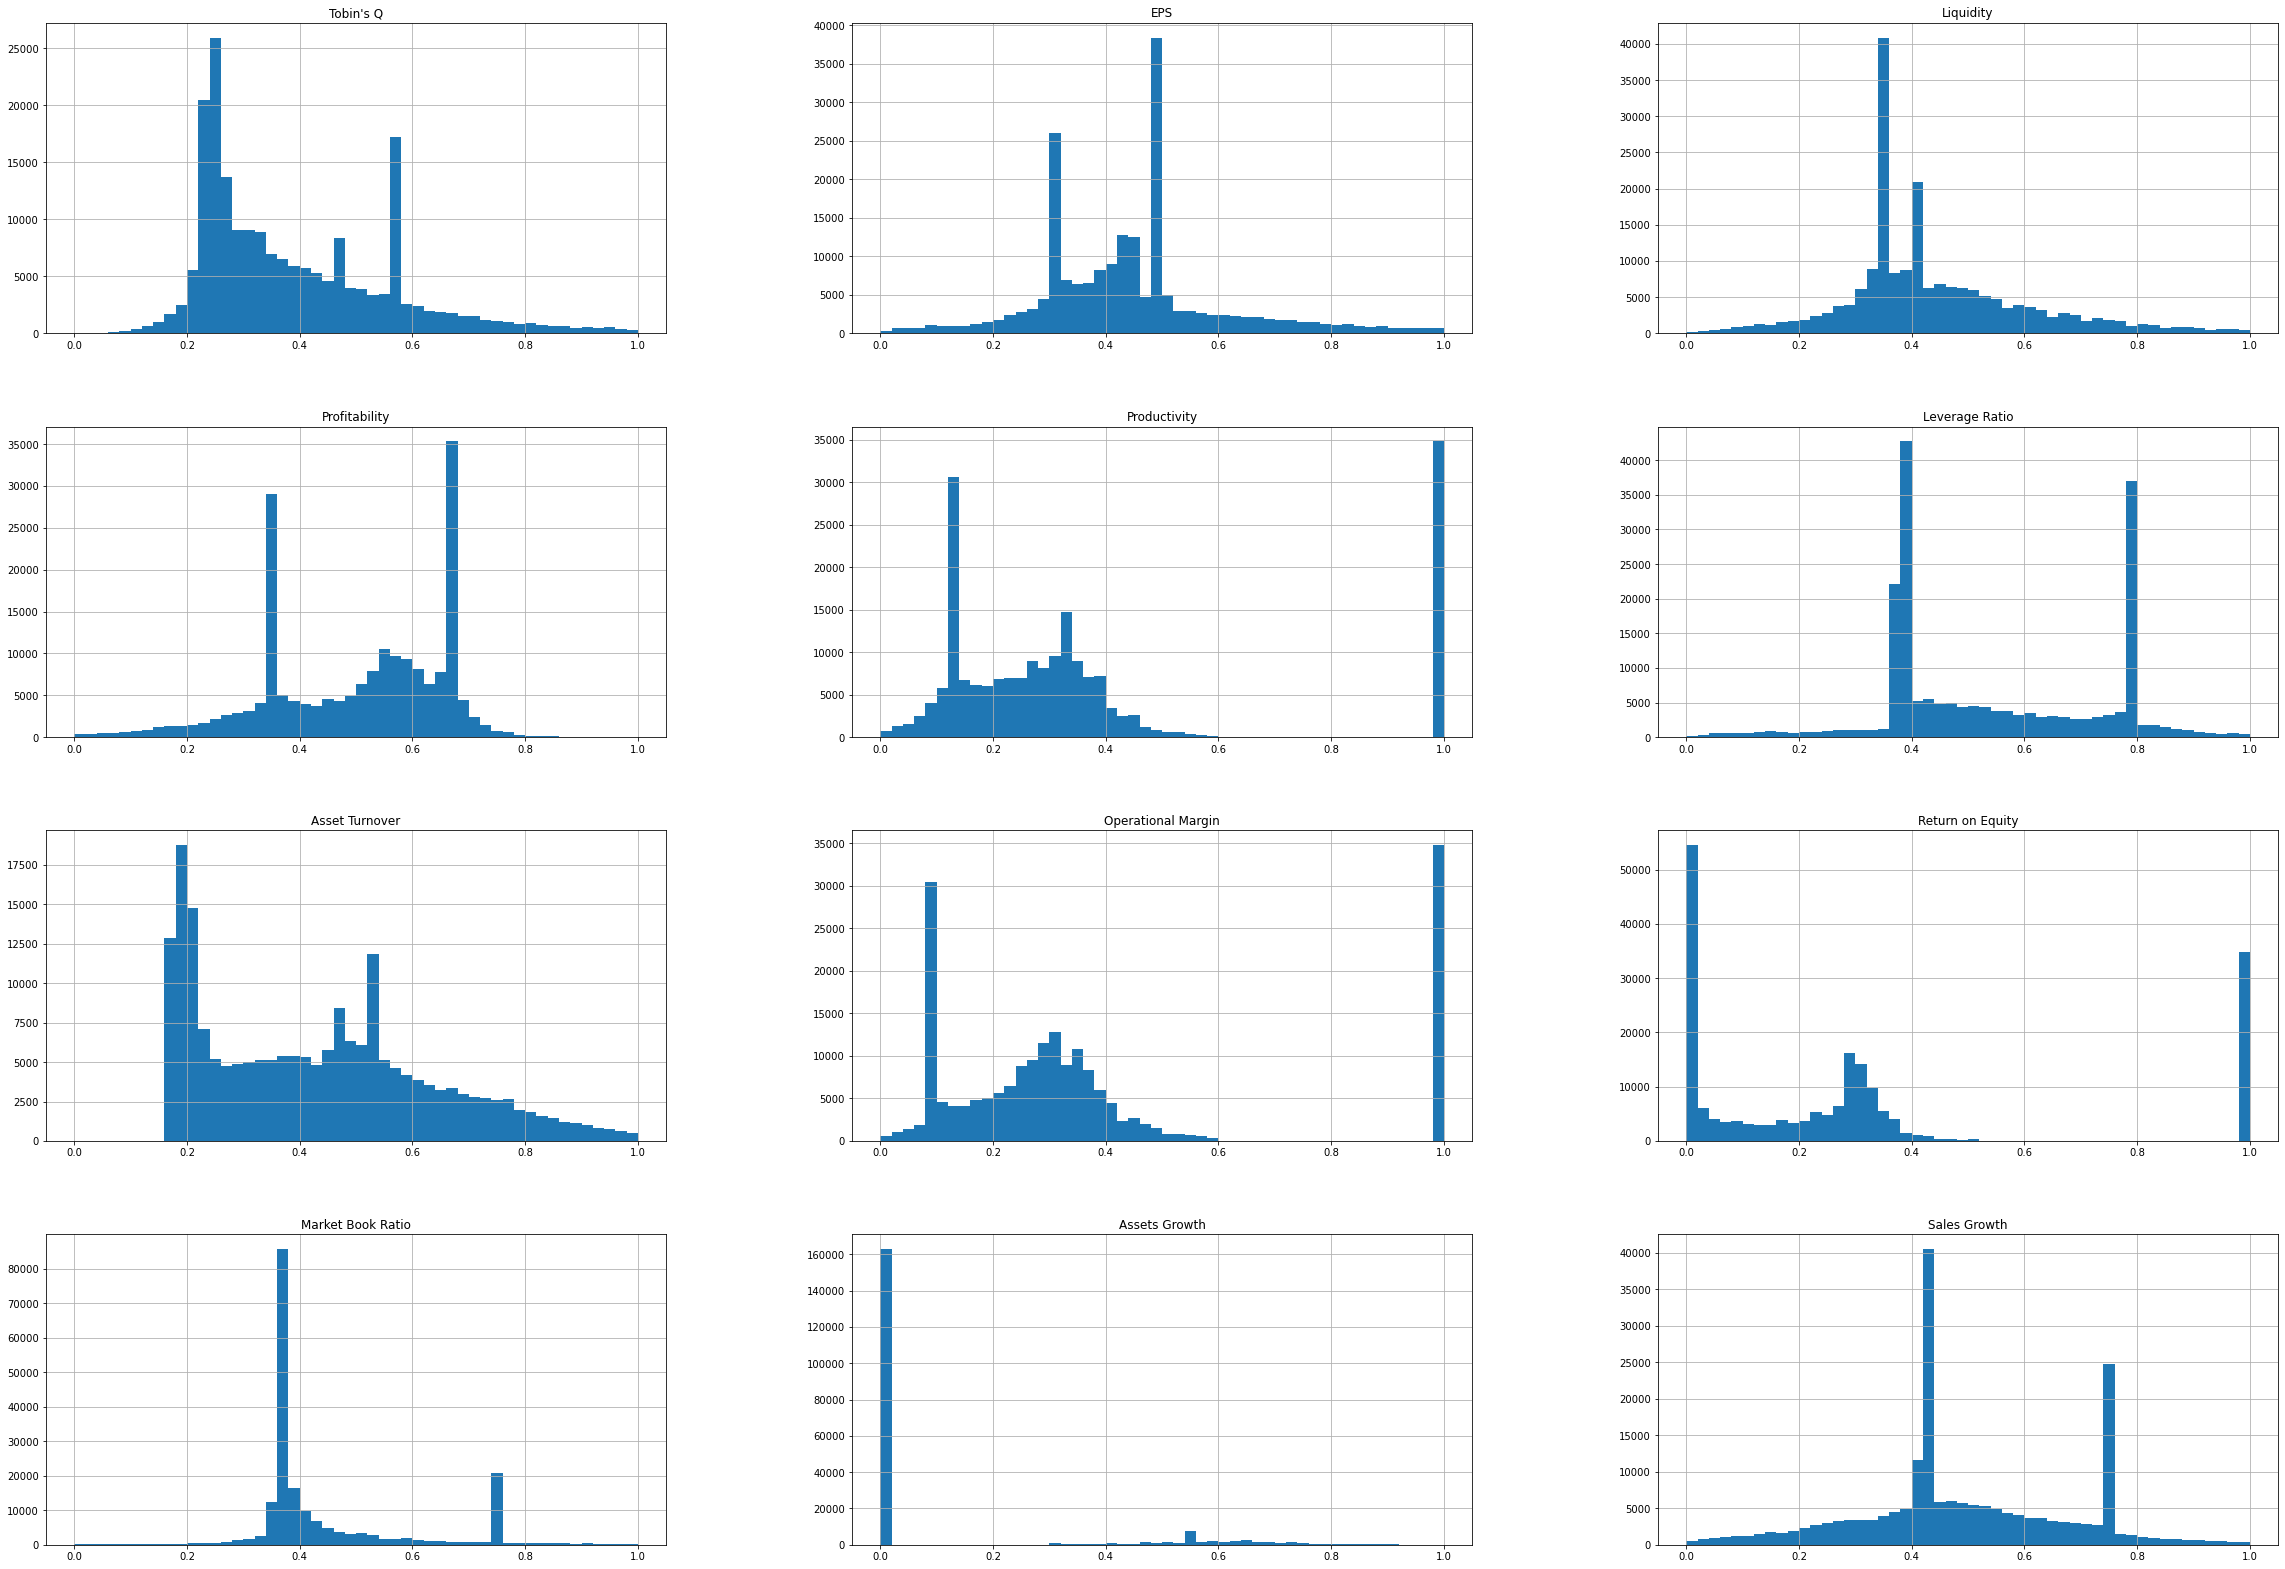

In [34]:
normalized_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

In [35]:
##Standardization

In [36]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.95592588,  0.26698347, -0.5797823 , ..., -0.55220852,
         1.71301219, -0.32166777],
       [-0.89100528,  0.24557042, -0.56296289, ..., -0.55175686,
         2.2038722 , -0.32179153],
       [-0.71339129,  0.26355119, -0.53822403, ..., -0.55284105,
         2.71210778, -0.32146774],
       ...,
       [-0.22493932,  0.33207742, -1.79222522, ...,  0.07067725,
        -0.45024697,  0.57359916],
       [ 2.42840925, -0.80344432, -0.03532738, ..., -0.62867579,
        -0.45024697, -2.28056059],
       [-0.67109845, -0.81254796,  0.57227804, ..., -0.54633423,
        -0.45024697, -1.63443153]])

In [37]:
X_scaled.std()

1.0000000000000002

In [38]:
Standard_data_df = pd.DataFrame(X_scaled,columns = df.columns[0:12])

In [39]:
Standard_data_df.shape

(197772, 12)

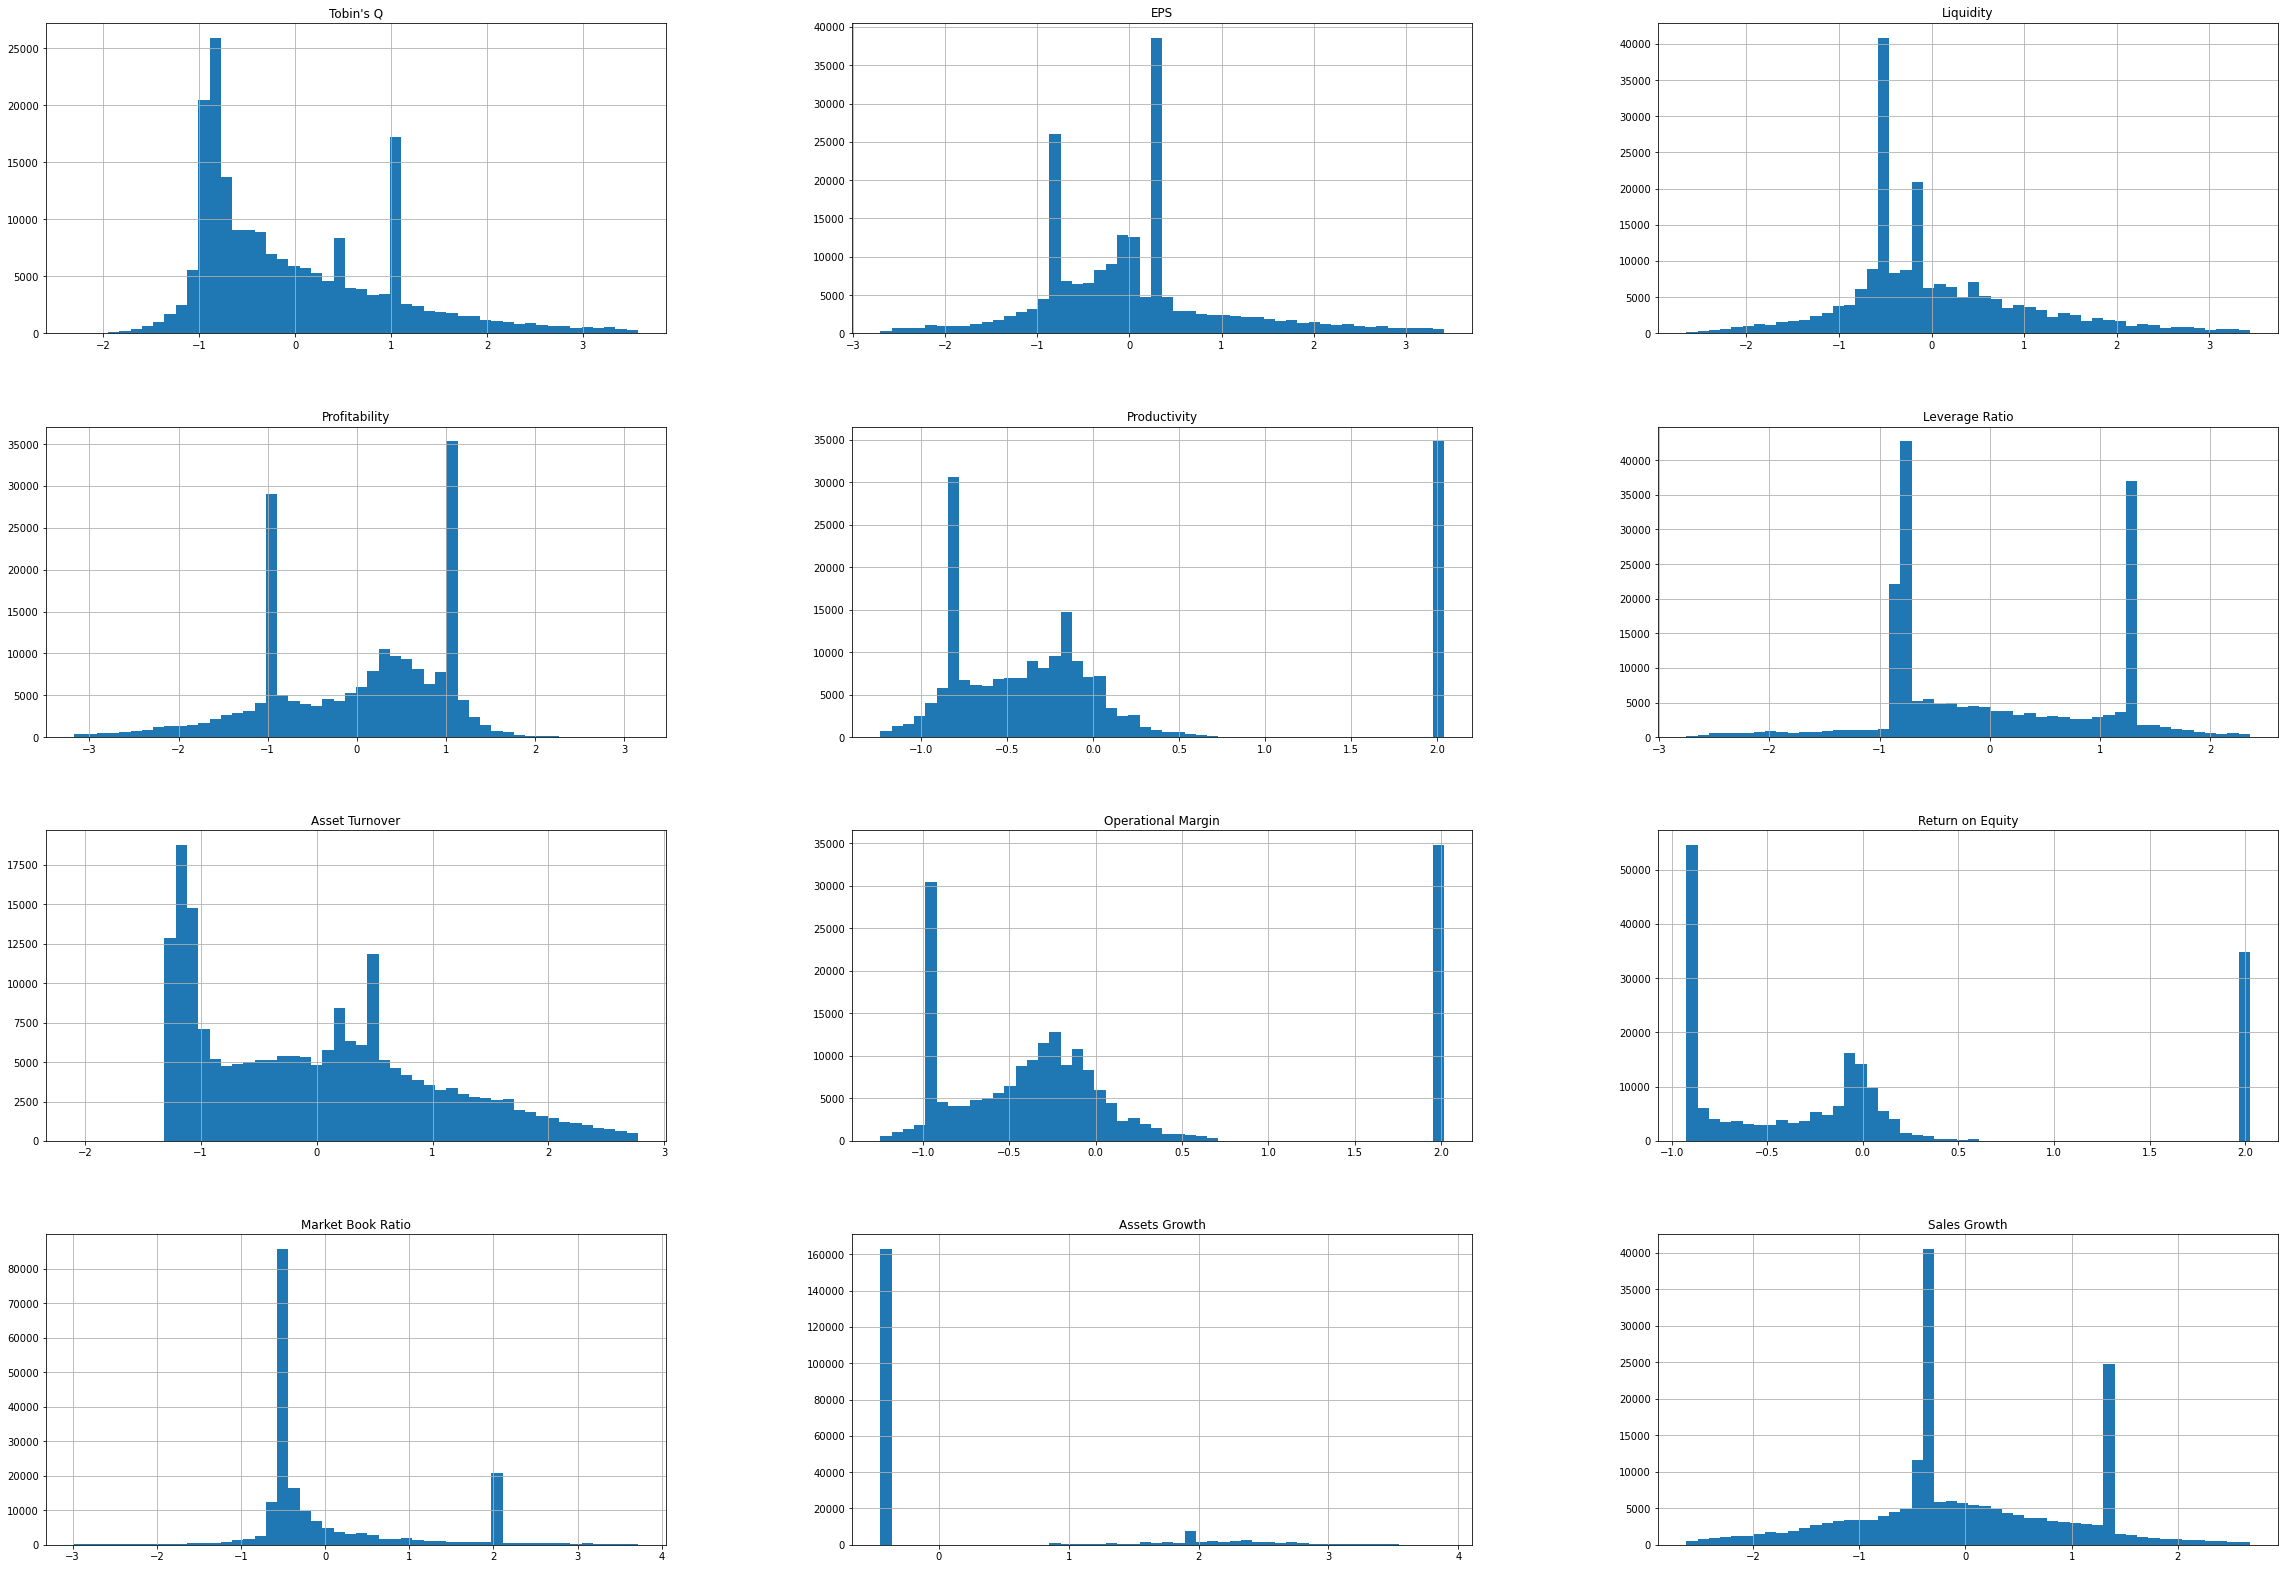

In [40]:
Standard_data_df.hist(figsize = (40,28), bins = 50)
plt.show()

PAir plot

In [41]:
ppp = pd.concat([Standard_data_df,y],axis=1)

In [42]:
ppp

,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,BK
0,-0.955926,0.266983,-0.579782,1.103104,2.037436,-0.794554,-1.141079,2.015530,2.013023,-0.552209,1.713012,-0.321668,1.0
1,-0.891005,0.245570,-0.562963,1.035784,2.037135,-0.794554,-1.178094,2.015534,2.011913,-0.551757,2.203872,-0.321792,1.0
2,-0.713391,0.263551,-0.538224,1.100870,2.037152,-0.794554,-1.259527,2.015554,2.015116,-0.552841,2.712108,-0.321468,1.0
3,-0.960775,0.262145,-0.571120,1.103740,2.036903,-0.795003,-1.136144,2.015502,2.013023,-0.540051,1.669573,-0.321982,1.0
4,-0.990015,0.249442,-0.562935,1.036988,2.036992,-0.794554,-0.995486,2.015530,2.011922,-0.538186,1.943239,-0.321703,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
197767,0.959018,-0.456053,-0.166729,-0.959507,-0.837995,0.120040,1.142735,-0.955475,-0.868161,-0.620644,-0.450247,1.386785,1.0
197768,1.079298,-0.299694,-0.479734,-0.959507,-0.837995,-2.192153,-0.678871,-0.955475,-0.480083,-2.353219,-0.450247,1.386785,1.0
197769,-0.224939,0.332077,-1.792225,-1.070441,-0.215970,0.932312,0.043058,-0.310960,0.001812,0.070677,-0.450247,0.573599,1.0
197770,2.428409,-0.803444,-0.035327,-0.959507,-0.837995,1.201320,-0.321331,-0.955475,-0.868161,-0.628676,-0.450247,-2.280561,1.0


In [43]:
# sns.pairplot(ppp[5:-1],hue='BK')

In [44]:
# X = df.drop(['BK'],axis=1)

In [45]:
# y = df['BK']

In [46]:
X.shape

(197772, 12)

In [47]:
y.shape

(197772,)

In [48]:
pca = PCA(n_components=12)
X_pca = pca.fit_transform(X_scaled)

In [49]:
print("Shape after PCA",X_pca.shape)

Shape after PCA (197772, 12)


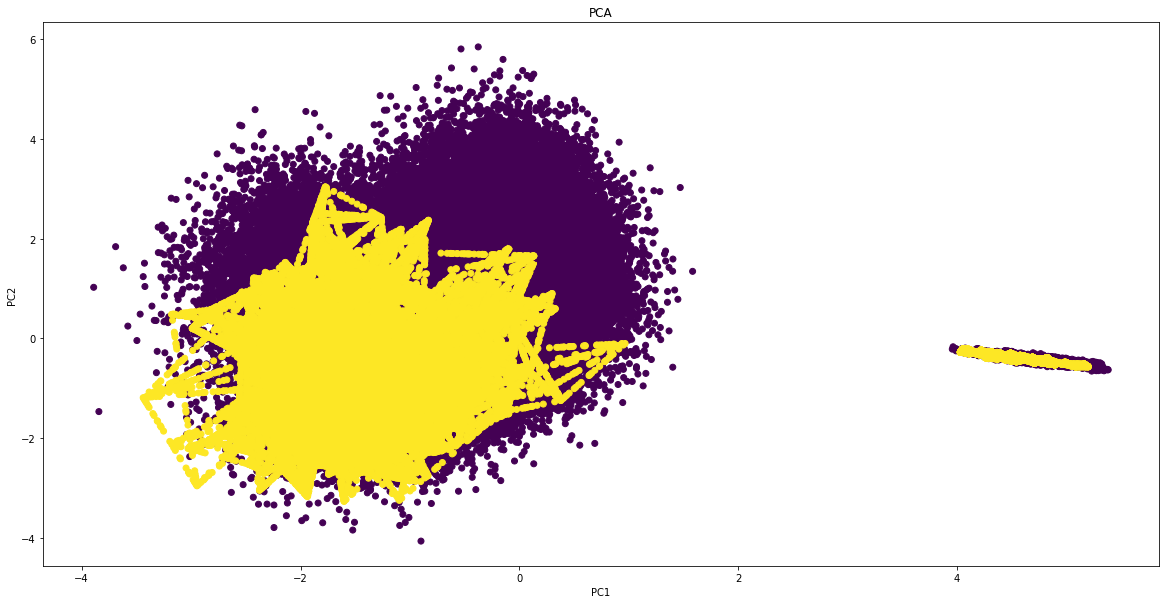

In [50]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

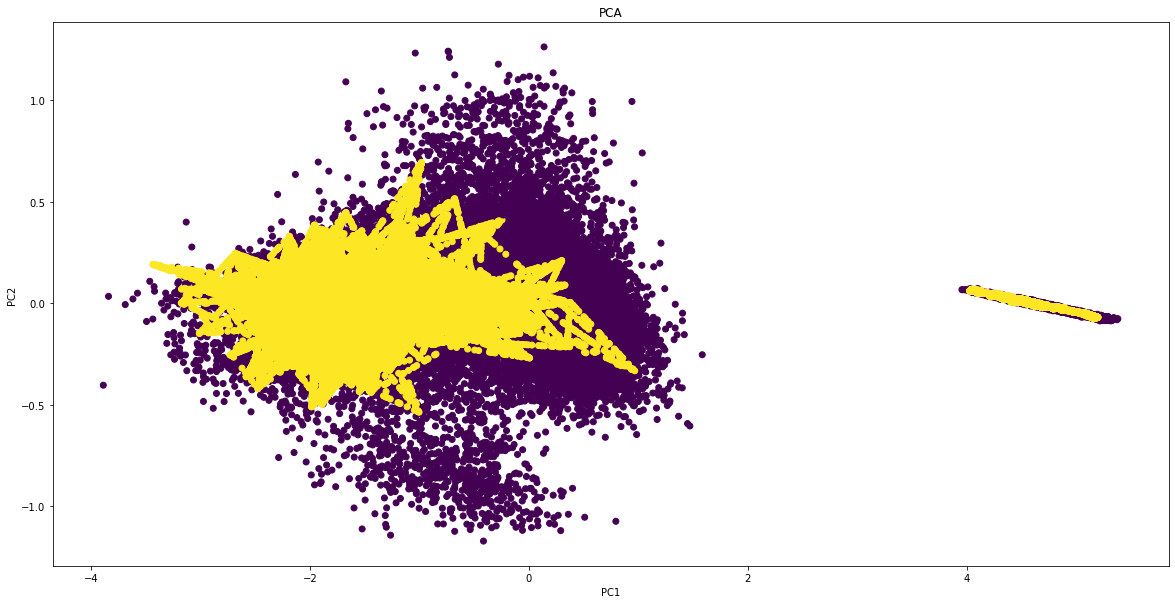

In [51]:
plt.figure(figsize=(20,10))
plt.scatter(X_pca[:,0],X_pca[:,-1],c=y)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA')
plt.show()

In [52]:
X_pca.shape

(197772, 12)

In [53]:
df_pca = pd.DataFrame(X_pca, columns = ['Column_A','Column_B','Column_C','Column_D','Column_E','Column_F','Column_G','Column_H','Column_I','Column_J','Column_K','Column_L'])

In [54]:
df_pca

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H,Column_I,Column_J,Column_K,Column_L
0,4.441718,-0.386421,0.322728,0.035267,0.000473,0.013172,-0.083108,-0.004785,0.038595,-0.285760,0.075110,0.023563
1,4.613173,-0.431451,0.484790,0.044983,0.021494,0.037093,-0.188168,0.093340,0.167358,0.097952,-0.014385,0.000836
2,4.826928,-0.384060,0.640270,0.065548,0.063128,0.087019,-0.304801,0.245507,0.162141,0.520384,-0.108917,-0.026238
3,4.421123,-0.376859,0.312249,0.032791,0.003446,0.001385,-0.082804,-0.015731,0.034143,-0.320407,0.082816,0.025359
4,4.484098,-0.435372,0.309565,-0.010189,-0.005106,0.063682,-0.193640,-0.027392,0.195368,-0.104812,0.038615,0.012175
...,...,...,...,...,...,...,...,...,...,...,...,...
197767,-2.206631,-0.049441,0.446228,-0.011426,-1.282195,1.103189,-0.499671,0.021779,0.134390,0.274689,0.011587,0.024769
197768,-1.040282,-0.166740,2.511053,-1.133787,-1.821217,1.597844,1.334323,-0.199917,-0.854417,0.004300,0.238834,-0.053119
197769,-0.708410,-0.865023,-0.114544,1.758641,-0.265589,0.864469,0.561323,-0.055675,0.609317,-0.303643,0.335502,0.042689
197770,-2.199249,-0.988100,0.751975,-0.399456,2.109062,0.535694,-0.172756,2.230545,-0.921764,0.203744,0.075444,0.059959


In [55]:
final = pd.concat([df_pca,y],axis=1)

In [56]:
from sklearn.model_selection import train_test_split
X_trai, X_test, y_trai,y_test = train_test_split(df_pca,y,test_size=0.2,random_state = 42)

In [57]:
X_train, X_val, y_train,y_val = train_test_split(X_trai,y_trai,test_size=0.2,random_state = 42)

In [58]:
X_val.shape

(31644, 12)

In [59]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [60]:
xgbc.score(X_test, y_test)

0.9547718366830995

Mean: ROC AUC=0.500
TP: ROC AUC=0.985


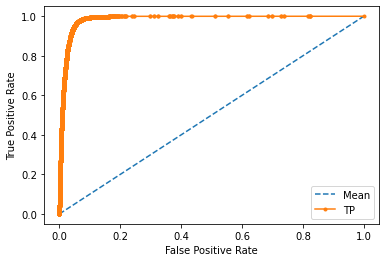

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_probs = xgbc.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Mean: ROC AUC=%.3f' % (ns_auc))
print('TP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Mean')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='TP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [60]:
from sklearn.model_selection import cross_val_score

In [61]:
print(cross_val_score(xgbc, X_train, y_train, cv=3))

[0.95143514 0.9536631  0.9521936 ]


In [96]:
from sklearn.model_selection import GridSearchCV
xgbc = XGBClassifier()
param_grid = {'gamma': [0,1,3,5,10],
              'learning_rate': [0.01, 0.05,0.25,0.5],
              'max_depth': [5,7,10,15],
              'n_estimators': [25,50,100,150]}
grid_search=GridSearchCV(estimator = xgbc,param_grid=param_grid,scoring='accuracy', return_train_score=True, verbose=3, cv=3)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 320 candidates, totalling 960 fits
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=25;, score=(train=0.837, test=0.835) total time=   0.9s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=25;, score=(train=0.842, test=0.841) total time=   0.9s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=25;, score=(train=0.837, test=0.832) total time=   0.9s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50;, score=(train=0.851, test=0.848) total time=   1.7s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50;, score=(train=0.856, test=0.854) total time=   1.7s
[CV 3/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=50;, score=(train=0.847, test=0.841) total time=   1.7s
[CV 1/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=100;, score=(train=0.863, test=0.860) total time=   3.3s
[CV 2/3] END gamma=0, learning_rate=0.01, max_depth=5, n_estimators=

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_ca...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                        

In [66]:
grid_search.score(X_test, y_test)

0.9821008722032613

In [78]:
grid_search.best_params_

{'gamma': 0, 'learning_rate': 0.5, 'max_depth': 15, 'n_estimators': 150}

In [72]:
y_pred = grid_search.predict(X_test)

In [73]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred,y_test))

[[19047    27]
 [  681 19800]]


In [74]:
confusion_matrix(y_test, y_pred)

array([[19047,   681],
       [   27, 19800]])

In [83]:
y_score = XGBClassifier(gamma=0, learning_rate=0.5, max_depth= 15, n_estimators= 150).fit(X_train, y_train).predict(X_test)

In [84]:
y_score

array([0, 1, 1, ..., 1, 1, 1])

Mean: ROC AUC=0.500
TP: ROC AUC=0.997


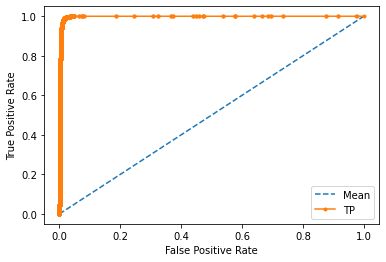

In [101]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Mean: ROC AUC=%.3f' % (ns_auc))
print('TP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Mean')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='TP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [99]:
from sklearn.metrics import f1_score

In [100]:
f1_score(y_test, y_pred)

0.9824352485858886

In [62]:
from sklearn.svm import SVC
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)

SVC(probability=True)

In [63]:
svc_model.score(X_test, y_test)

0.9022626722285425

Mean: ROC AUC=0.500
TP: ROC AUC=0.960


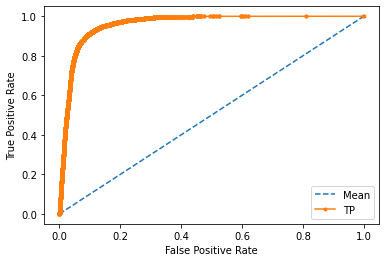

In [90]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_probs = svc_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Mean: ROC AUC=%.3f' % (ns_auc))
print('TP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Mean')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='TP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [104]:
X_train

,Column_A,Column_B,Column_C,Column_D,Column_E,Column_F,Column_G,Column_H,Column_I,Column_J,Column_K,Column_L
170897,-1.727363,-2.080111,-0.808303,0.082603,0.728823,1.114791,0.130299,0.431118,1.415560,-0.272138,-0.041782,0.040179
181726,-0.653924,-2.203349,-0.255800,0.336476,1.069754,-1.017082,0.538074,0.403412,-0.961102,-0.129208,-0.252591,0.140111
196406,-1.969806,-0.035389,0.009283,-0.146208,-1.378892,0.107315,-0.687381,-0.340863,0.115673,0.296791,-0.049189,-0.029469
153380,-1.265722,-2.109537,-2.068342,-0.228353,0.333087,0.360453,-0.760661,-0.181853,0.083146,0.002929,-0.206641,0.123239
65432,-0.418032,0.801628,-0.296669,2.185125,-0.267596,-0.189491,-0.494131,-1.509648,-0.116930,-0.100173,0.006683,-0.001311
...,...,...,...,...,...,...,...,...,...,...,...,...
97748,-1.066589,-0.976500,-1.063456,-0.637556,-0.205355,-1.108471,-0.457538,0.428529,-0.172362,-0.022778,-0.360139,0.111133
99412,-0.003815,-0.668424,-1.383730,-0.802619,-0.083721,0.297005,0.237470,-1.410095,-0.219976,-0.031456,0.155111,0.020575
102188,4.409295,-0.364672,0.324280,0.042671,0.006950,0.015646,-0.065846,0.006649,-0.000796,-0.382635,0.095267,0.028621
152645,4.650073,-0.386943,0.403441,-0.017185,0.038787,0.215657,-0.373405,0.105273,0.194426,0.266684,-0.038391,-0.013581


In [65]:
from sklearn.model_selection import GridSearchCV
svc_model = SVC(probability=True)
param_grid = {'kernel':['linear', 'poly', 'rbf']}
grid_search=GridSearchCV(estimator = svc_model,param_grid=param_grid,scoring='accuracy', return_train_score=True, verbose=3, cv=3)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
[CV 1/3] END .kernel=linear;, score=(train=0.825, test=0.825) total time=25.8min
[CV 2/3] END .kernel=linear;, score=(train=0.826, test=0.824) total time=24.2min
[CV 3/3] END .kernel=linear;, score=(train=0.822, test=0.823) total time=24.2min
[CV 1/3] END ...kernel=poly;, score=(train=0.880, test=0.876) total time=13.6min
[CV 2/3] END ...kernel=poly;, score=(train=0.879, test=0.879) total time=13.5min
[CV 3/3] END ...kernel=poly;, score=(train=0.879, test=0.879) total time=13.5min
[CV 1/3] END ....kernel=rbf;, score=(train=0.897, test=0.896) total time=15.9min
[CV 2/3] END ....kernel=rbf;, score=(train=0.897, test=0.895) total time=15.9min
[CV 3/3] END ....kernel=rbf;, score=(train=0.897, test=0.895) total time=16.0min


GridSearchCV(cv=3, estimator=SVC(probability=True),
             param_grid={'kernel': ['linear', 'poly', 'rbf']},
             return_train_score=True, scoring='accuracy', verbose=3)

Mean: ROC AUC=0.500
TP: ROC AUC=0.960


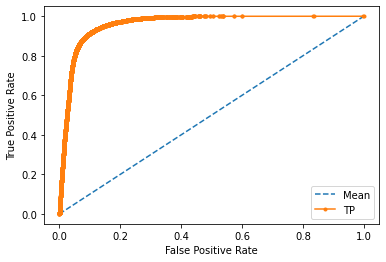

In [66]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
lr_probs = grid_search.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
ns_probs = [0 for _ in range(len(y_test))]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('Mean: ROC AUC=%.3f' % (ns_auc))
print('TP: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Mean')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='TP')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [67]:
grid_search.score(X_test, y_test)

0.9022626722285425